# Verizon #2 - Customer Churn Prediction Model
* Challenge Advisor: Dhananjaya Ramachandra
* Contributors: Ria Kundu, Ami Rajesh, David Wang, Rachel Chan, and Maggie Killada

## Initial Setup

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# navigate to data
import os
import pandas as pd

# ensure 'Team Verizon_2' is added to MyDrive'
df_train = pd.read_excel('/content/drive/MyDrive/Team Verizon_2/training and test data/mobile_subscriber_churn_train.xlsx', engine = 'openpyxl')
df_test = pd.read_excel('/content/drive/MyDrive/Team Verizon_2/training and test data/mobile_subscriber_churn_test.xlsx', engine='openpyxl')

In [ ]:
# display
display(df_train.head())
display(df_test.head())

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis and Feature Engineering

### EDA on Dataset (with Charts and Statistics)

Before visualizing, it's crucial to understand the structure of the dataset as well as any missing data, incorrect data types, and potential issues with feature distributions.

In [ ]:
# Display Basic info
df_train.info()

# Display summary statistics of numerical features
df_summ = df_train.describe()
df_summ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Check for missing values in the dataset
df_train.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


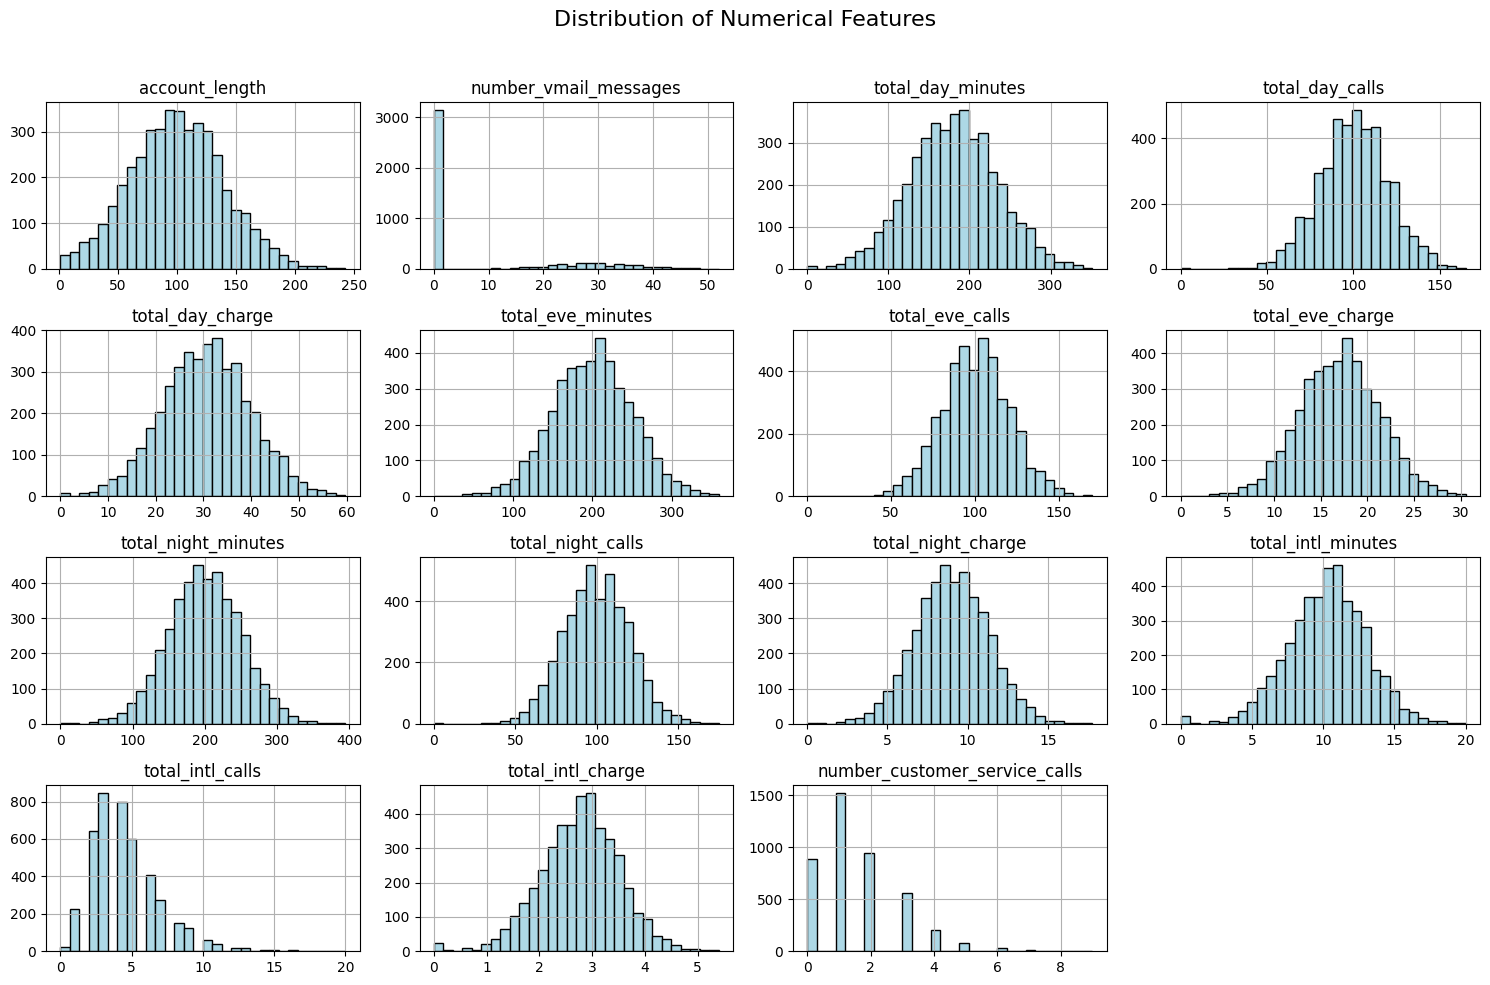

In [ ]:
# Plot histograms for all numerical columns
axes = df_train.hist(bins=30, figsize=(15, 10), color='lightblue', edgecolor='black')

# Add an overall title
plt.suptitle('Distribution of Numerical Features', fontsize=16)

# Common X-axis and Y-axis labels
plt.xlabel('Feature Value', fontsize=12, labelpad=20)  # X-axis label for the entire figure
plt.ylabel('Frequency', fontsize=12, labelpad=20)      # Y-axis label for the entire figure

# Adjust the layout to ensure labels and titles fit properly
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()


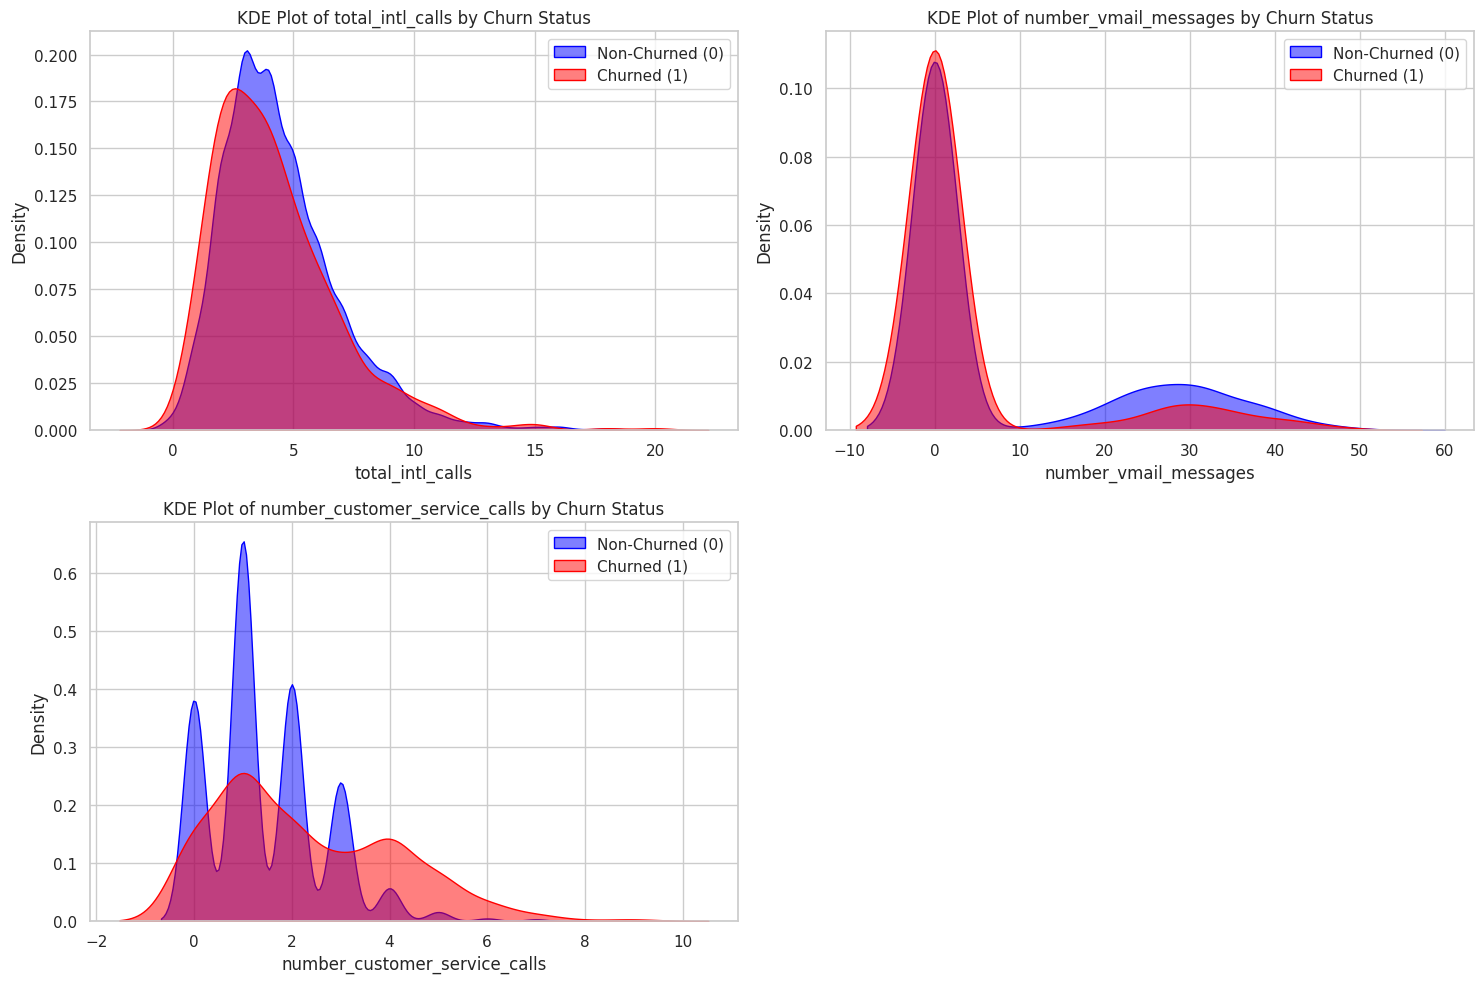

In [ ]:
sns.set(style="whitegrid")
features_to_plot =['total_intl_calls','number_vmail_messages','number_customer_service_calls']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each feature
    sns.kdeplot(df_train[df_train['churn'] == 0][feature], label='Non-Churned (0)', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(df_train[df_train['churn'] == 1][feature], label='Churned (1)', color='red', fill=True, alpha=0.5)

    plt.title(f'KDE Plot of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

Bar chart to visualize the values of 'international_plan' and 'voicemail_plan':

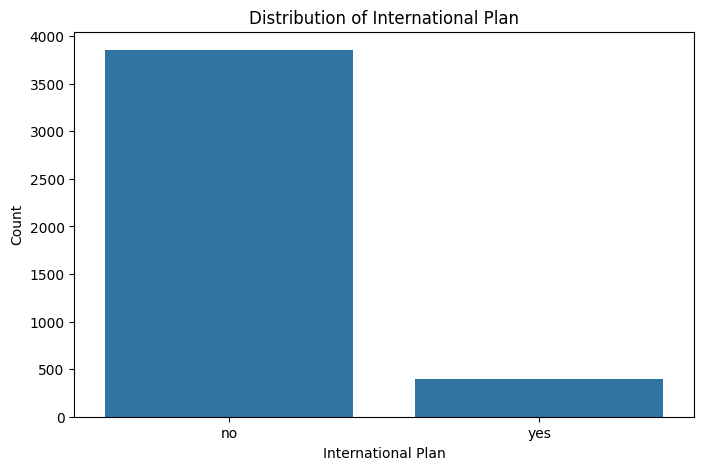

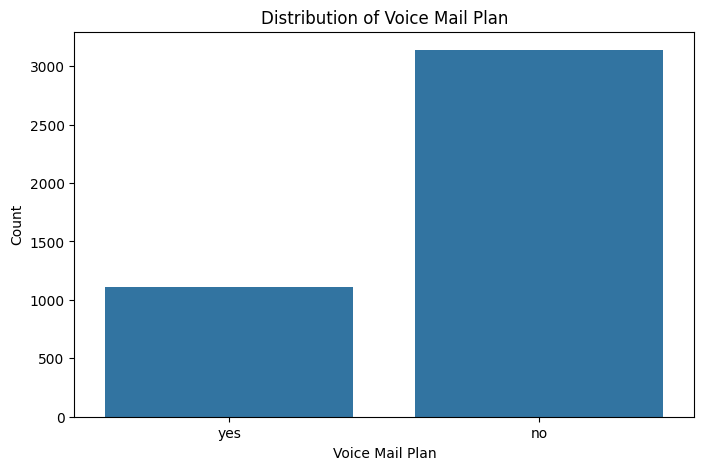

In [ ]:
# plot for 'international_plan'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='international_plan')
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

# plot for 'voice_mail_plan'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='voice_mail_plan')
plt.title('Distribution of Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()

- There is larger frequency of responses for 'yes' than 'no' for 'international_plan'
- There is larger frequency of responses for 'no' than 'yes' for 'voicemail_plan'

:Bar chart to visualize the values of 'area_code':

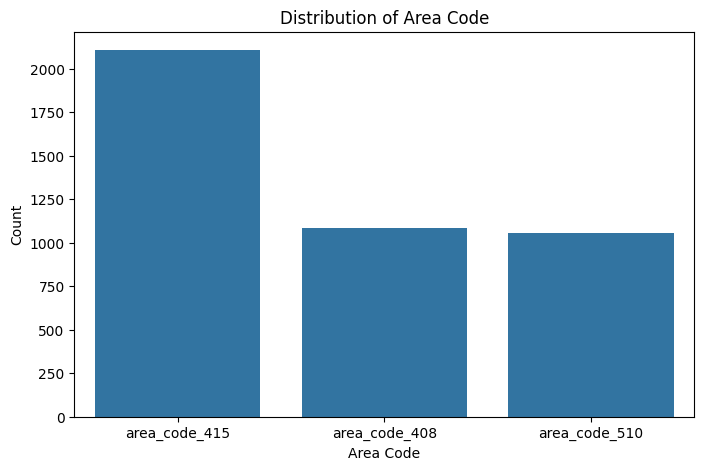

In [ ]:
# print the number of unique values in 'area_code' column
df_test['area_code'].nunique()

# plot for 'area_code'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='area_code')
plt.title('Distribution of Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

- The 'area_code' has 3 unique values: '415', '408', '510'
- The greatest frequency appears to be the value '415'

Bar chart to visualize the values of 'state':

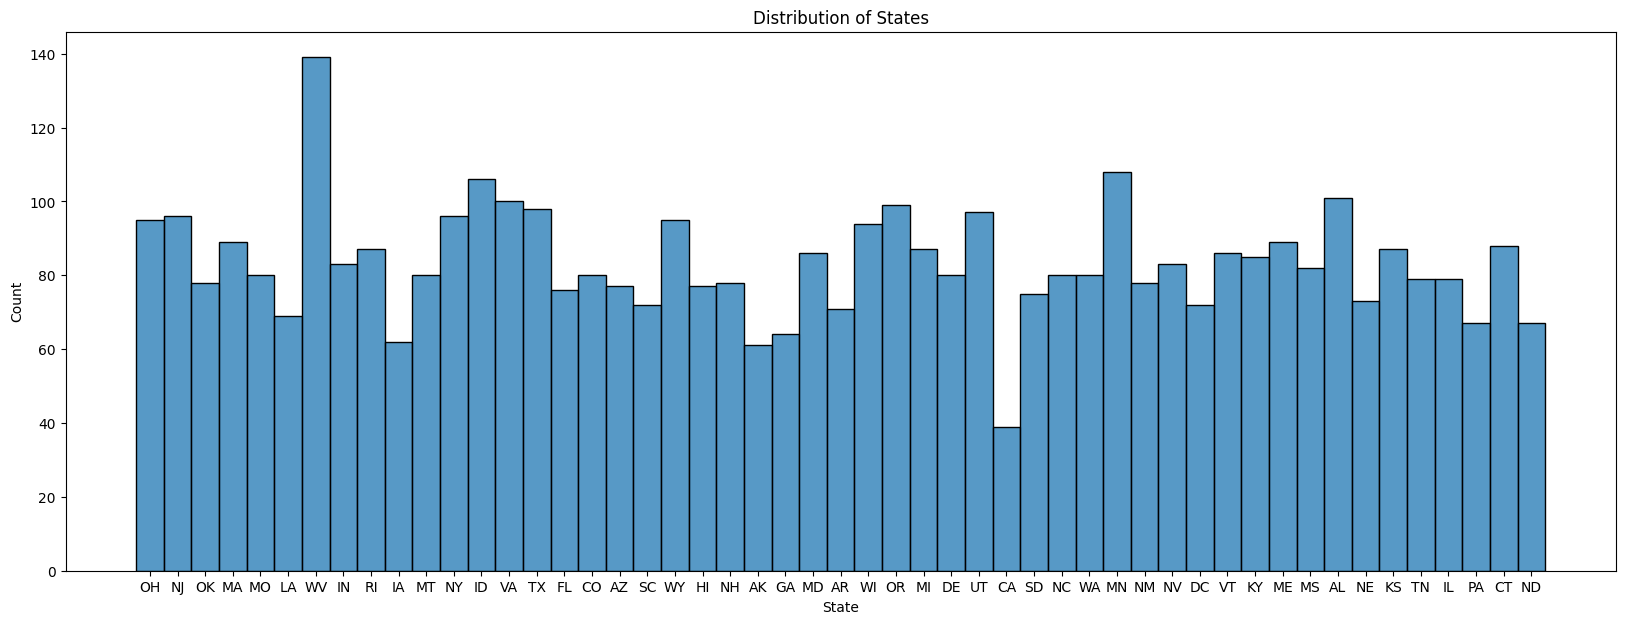

In [ ]:
# plot for 'state'
plt.figure(figsize=(20,7))
sns.histplot(data=df_train, x="state")
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

Data Analysis Questions:

In [ ]:
# print feature with most variation
print('Feature with most variation: ', df_summ.loc['std'].idxmax())

# print feature with highest range
column_ranges = df_summ.loc['max'] - df_summ.loc['min']
column_range_name = column_ranges.idxmax()
print('Feature with highest range: ', column_range_name)

Feature with most variation:  total_day_minutes
Feature with highest range:  total_night_minutes


### Encoding and Feature Engineering

Binary encoding for the 'international_plan', 'voicemail_plan', 'churn' columns and label encoding for the 'state' column:

In [ ]:
# binary encode 'international_plan', 'voice_mail_plan', 'churn' column to make data easier to interpret
df_train['international_plan'] = df_train['international_plan'].replace({'yes': 1, 'no': 0})
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].replace({'yes': 1, 'no': 0})
df_train['churn'] = df_train['churn'].replace({'yes': 1, 'no': 0})

# label encode 'state' column to change the state labels into numerical values
label_encoder = LabelEncoder()
df_train['state'] = label_encoder.fit_transform(df_train['state'])
df_train['state'].head()

,state
0,35
1,31
2,35
3,36
4,19


- Binary encoding for columns with 'yes'/'no' answers with 1 meaning 'yes' and 0 meaning 'no'
- Each state is now mapped to a unique integer value, makes data numerical and easier to process for data analysis

Convert 'area_code' to an integer value:

In [ ]:
# convert 'area_code' into int and remove string ‘area_code_’
df_train['area_code'] = df_train['area_code'].str.replace('area_code_', '')
df_train['area_code'] = df_train['area_code'].astype(int)

#### Previous Ideas

In [ ]:
''' AGGREGATED COLUMNS
# sum up ‘total_day_charge’, ‘total_eve_charge’, ‘total_night_charge’, and ‘total_inl_charge’ to get a total charge feature
df_train['total_charge'] = df_train['total_day_charge'] + df_train['total_eve_charge'] + df_train['total_night_charge'] + df_train['total_intl_charge']

# sum up ‘total_day_minutes’, ‘total_eve_minutes’, ‘total_night_minutes’, and ‘total_inl_minutes’ to get a total minutes feature
df_train['total_minutes'] = df_train['total_day_minutes'] + df_train['total_eve_minutes'] + df_train['total_night_minutes'] + df_train['total_intl_minutes']

# sum up ‘total_day_calls’, ‘total_eve_calls’, ‘total_night_calls’, and ‘total_inl_calls’ to get a total calls feature
df_train['total_calls'] = df_train['total_day_calls'] + df_train['total_eve_calls'] + df_train['total_night_calls'] + df_train['total_intl_calls']
'''

" AGGREGATED COLUMNS\n# sum up ‘total_day_charge’, ‘total_eve_charge’, ‘total_night_charge’, and ‘total_inl_charge’ to get a total charge feature\ndf_train['total_charge'] = df_train['total_day_charge'] + df_train['total_eve_charge'] + df_train['total_night_charge'] + df_train['total_intl_charge']\n\n# sum up ‘total_day_minutes’, ‘total_eve_minutes’, ‘total_night_minutes’, and ‘total_inl_minutes’ to get a total minutes feature\ndf_train['total_minutes'] = df_train['total_day_minutes'] + df_train['total_eve_minutes'] + df_train['total_night_minutes'] + df_train['total_intl_minutes']\n\n# sum up ‘total_day_calls’, ‘total_eve_calls’, ‘total_night_calls’, and ‘total_inl_calls’ to get a total calls feature\ndf_train['total_calls'] = df_train['total_day_calls'] + df_train['total_eve_calls'] + df_train['total_night_calls'] + df_train['total_intl_calls']\n"

In [ ]:
''' URBANIZATION SCORE
# group the states into larger categories ranked by population/level of urbanization (1 (Highest urbanization) and 3 (Lowest urbanization))
state_mapping = {
    "CA": 1, "TX": 1, "FL": 1, "NY": 1, "IL": 1,  "PA": 2, "OH": 2, "GA": 2, "NC": 2, "MI": 2,
    "NJ": 3, "VA": 3, "WA": 3, "AZ": 3, "MA": 3,  "TN": 4, "IN": 4, "MO": 4, "MD": 4, "WI": 4,
    "CO": 5, "MN": 5, "SC": 5, "AL": 5, "LA": 5,  "KY": 6, "OR": 6, "OK": 6, "CT": 6, "IA": 6,
    "MS": 7, "AR": 7, "KS": 7, "UT": 7, "NV": 7,  "NM": 8, "WV": 8, "NE": 8, "ID": 8, "HI": 8,
    "ME": 9, "NH": 9, "RI": 9, "MT": 9, "DE": 9,  "SD": 10, "ND": 10, "WY": 10, "VT": 10, "AK": 10
}

# Map states to urbanization score in the DataFrame
df_train['urbanization_score'] = df_train['state'].map(state_mapping)

print(df_train[['state', 'urbanization_score']].head())

# Categorize the area code; as there are only three area code - 408, 415 and 510 based on the research,
# we got an ranking for each area code based on urbanization (1 (Highest urbanization) and 3 (Lowest urbanization))
area_code_mapping = {415: 1, 408: 2, 510: 3}
df_train['urbanization_score'] = df_train['area_code'].map(area_code_mapping)

df_train.drop(columns = 'state', inplace = True)
'''

' URBANIZATION SCORE\n# group the states into larger categories ranked by population/level of urbanization (1 (Highest urbanization) and 3 (Lowest urbanization))\nstate_mapping = {\n    "CA": 1, "TX": 1, "FL": 1, "NY": 1, "IL": 1,  "PA": 2, "OH": 2, "GA": 2, "NC": 2, "MI": 2,\n    "NJ": 3, "VA": 3, "WA": 3, "AZ": 3, "MA": 3,  "TN": 4, "IN": 4, "MO": 4, "MD": 4, "WI": 4,\n    "CO": 5, "MN": 5, "SC": 5, "AL": 5, "LA": 5,  "KY": 6, "OR": 6, "OK": 6, "CT": 6, "IA": 6,\n    "MS": 7, "AR": 7, "KS": 7, "UT": 7, "NV": 7,  "NM": 8, "WV": 8, "NE": 8, "ID": 8, "HI": 8,\n    "ME": 9, "NH": 9, "RI": 9, "MT": 9, "DE": 9,  "SD": 10, "ND": 10, "WY": 10, "VT": 10, "AK": 10\n}\n\n# Map states to urbanization score in the DataFrame\ndf_train[\'urbanization_score\'] = df_train[\'state\'].map(state_mapping)\n\nprint(df_train[[\'state\', \'urbanization_score\']].head())\n\n# Categorize the area code; as there are only three area code - 408, 415 and 510 based on the research,\n# we got an ranking for each ar

### Exploring Need for Normalization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
# Let us examine the distribution of the data for total_charge, total_minutes, and total_calls
plt.hist(df_train['total_charge'], edgecolor='black')
plt.title("Distribution of the total_charge in the training data")
plt.show()

plt.hist(df_train['total_minutes'], edgecolor='black')
plt.title("Distribution of the total_minutes in the training data")
plt.show()

plt.hist(df_train['total_calls'], edgecolor='black')
plt.title("Distribution of the total_calls in the training data")
plt.show()
'''

'\n# Let us examine the distribution of the data for total_charge, total_minutes, and total_calls\nplt.hist(df_train[\'total_charge\'], edgecolor=\'black\')\nplt.title("Distribution of the total_charge in the training data")\nplt.show()\n\nplt.hist(df_train[\'total_minutes\'], edgecolor=\'black\')\nplt.title("Distribution of the total_minutes in the training data")\nplt.show()\n\nplt.hist(df_train[\'total_calls\'], edgecolor=\'black\')\nplt.title("Distribution of the total_calls in the training data")\nplt.show()\n'

- As you can see, the distributions appear to be symmetric, unimodal, with no clear outliers based on this histogram, which is why we must create a box plot.

In [ ]:
'''
# Calculate IQR for selected columns
Q1 = df_train[['total_charge', 'total_minutes', 'total_calls']].quantile(0.25)
Q3 = df_train[['total_charge', 'total_minutes', 'total_calls']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df_train[((df_train[['total_charge', 'total_minutes', 'total_calls']] < lower_bound) | (df_train[['total_charge', 'total_minutes', 'total_calls']] > upper_bound)).any(axis=1)]
print("Outliers based on IQR:\n", outliers_iqr)

# Box plot showing outliers for total_charge
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_charge'])
plt.title('Box Plot of total_charge (with outliers)')
plt.show()

# Box plot for total_minutes
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_minutes'])
plt.title('Box Plot of total_minutes (with outliers)')
plt.show()

# Box plot for total_calls
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_calls'])
plt.title('Box Plot of total_calls (with outliers)')
plt.show()
'''

'\n# Calculate IQR for selected columns\nQ1 = df_train[[\'total_charge\', \'total_minutes\', \'total_calls\']].quantile(0.25)\nQ3 = df_train[[\'total_charge\', \'total_minutes\', \'total_calls\']].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define bounds for outliers\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Identify outliers\noutliers_iqr = df_train[((df_train[[\'total_charge\', \'total_minutes\', \'total_calls\']] < lower_bound) | (df_train[[\'total_charge\', \'total_minutes\', \'total_calls\']] > upper_bound)).any(axis=1)]\nprint("Outliers based on IQR:\n", outliers_iqr)\n\n# Box plot showing outliers for total_charge\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train[\'total_charge\'])\nplt.title(\'Box Plot of total_charge (with outliers)\')\nplt.show()\n\n# Box plot for total_minutes\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train[\'total_minutes\'])\nplt.title(\'Box Plot of total_minutes (with outliers)\')\nplt.show()\n\n# Box plot for total_calls\nplt.figure(f

In [ ]:
'''
import numpy as np
# Function to cap outliers at the lower and upper bounds
def cap_outliers(series, lower_bound, upper_bound):
    return np.clip(series, lower_bound, upper_bound)

# Cap outliers in each column at the IQR bounds
df_train['total_charge'] = cap_outliers(df_train['total_charge'], lower_bound['total_charge'], upper_bound['total_charge'])
df_train['total_minutes'] = cap_outliers(df_train['total_minutes'], lower_bound['total_minutes'], upper_bound['total_minutes'])
df_train['total_calls'] = cap_outliers(df_train['total_calls'], lower_bound['total_calls'], upper_bound['total_calls'])
'''

"\nimport numpy as np\n# Function to cap outliers at the lower and upper bounds\ndef cap_outliers(series, lower_bound, upper_bound):\n    return np.clip(series, lower_bound, upper_bound)\n\n# Cap outliers in each column at the IQR bounds\ndf_train['total_charge'] = cap_outliers(df_train['total_charge'], lower_bound['total_charge'], upper_bound['total_charge'])\ndf_train['total_minutes'] = cap_outliers(df_train['total_minutes'], lower_bound['total_minutes'], upper_bound['total_minutes'])\ndf_train['total_calls'] = cap_outliers(df_train['total_calls'], lower_bound['total_calls'], upper_bound['total_calls'])\n"

In [ ]:
'''
# Boxplot to visualize the effect of Capping on 'total_charge'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_charge'])
plt.title('Box Plot of total_charge After Capping')
plt.show()

# Boxplot to visualize 'total_minutes' after Capping
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_minutes'])
plt.title('Box Plot of total_minutes After Capping')
plt.show()

# Boxplot to visualize 'total_calls' after Capping
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_calls'])
plt.title('Box Plot of total_calls After Capping')
plt.show()
'''

"\n# Boxplot to visualize the effect of Capping on 'total_charge'\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train['total_charge'])\nplt.title('Box Plot of total_charge After Capping')\nplt.show()\n\n# Boxplot to visualize 'total_minutes' after Capping\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train['total_minutes'])\nplt.title('Box Plot of total_minutes After Capping')\nplt.show()\n\n# Boxplot to visualize 'total_calls' after Capping\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train['total_calls'])\nplt.title('Box Plot of total_calls After Capping')\nplt.show()\n"

### Exploring Balanced and Imbalanced Datasets

Bar chart to visualize the value frequency of the label column:

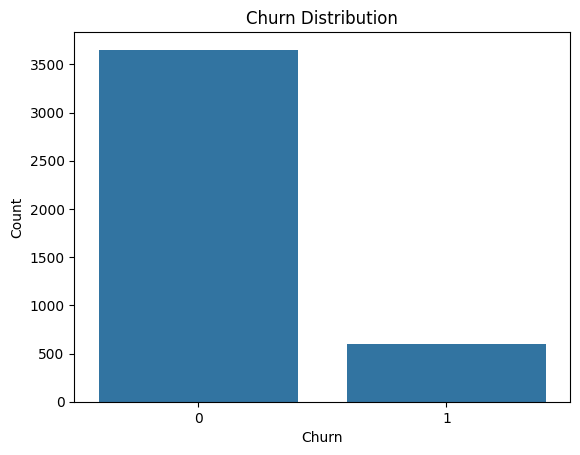

In [ ]:
# plot for 'voice_mail_plan'
churn_counts = df_train['churn'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
# calculate ratios
churn_proportion = churn_counts / len(df_train)
print(churn_proportion)

churn
0    0.859294
1    0.140706
Name: count, dtype: float64


- We can consider a dataset imbalanced if the ratio of the majority class to the minority class is greater than 4:1 or if the minority class constitutes less than 20% of the total data.
- To address issues arising from imbalanced datasets, we can use techniques like oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
- Later on, we can use metrics such as F1-score, Precision-Recall curve, and AUC-ROC instead of accuracy alone, as accuracy can be misleading in these cases.

Implementation of the Synthetic Minority Over-sampling Technique:

In [ ]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

columns_to_drop = ['churn', 'area_code'] # replace these columns later if needed
X = df_train.drop(columns=columns_to_drop, axis=1)
y = df_train['churn']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y) # use SMOTE to resample data

X_resampled
y_resampled

,churn
0,0
1,0
2,0
3,0
4,0
...,...
7299,1
7300,1
7301,1
7302,1


### Correlation Across Features and Label (with Charts/Graphs)

Correlation Matrix Implementation:

In [ ]:
# create correlation matrix and query the ‘churn’ column to see the top values correlated with the label
corr_matrix = round(df_train.corr(),5) # correlation matrix
display(corr_matrix)
corrs = corr_matrix['churn']
corrs_sorted = corrs.sort_values(ascending = False)
display(corrs_sorted)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.00000,0.00882,0.02164,0.00382,-0.03475,-0.03086,0.01426,-0.00989,0.01426,0.00160,-0.00912,0.00160,0.00483,-0.00660,0.00482,-0.01026,0.00747,-0.01028,-0.02042,0.00718
account_length,0.00882,1.00000,-0.01997,0.02705,0.00166,-0.00663,-0.00161,0.02300,-0.00161,-0.01033,0.00554,-0.01032,-0.00992,-0.00185,-0.00994,0.00454,0.01369,0.00449,0.00100,0.01938
area_code,0.02164,-0.01997,1.00000,0.02786,-0.00834,-0.00713,-0.00820,-0.03448,-0.00820,0.01086,-0.00847,0.01087,0.00675,0.01815,0.00674,-0.00642,-0.01941,-0.00651,0.02288,0.01596
international_plan,0.00382,0.02705,0.02786,1.00000,0.00071,0.00481,0.04006,0.00978,0.04006,0.02348,-0.00300,0.02348,-0.02069,0.00715,-0.02069,0.02382,0.00696,0.02380,-0.00888,0.25905
voice_mail_plan,-0.03475,0.00166,-0.00834,0.00071,1.00000,0.95401,-0.00065,-0.01000,-0.00066,0.01198,0.00026,0.01199,0.01788,0.00787,0.01788,0.00810,-0.00567,0.00813,-0.02150,-0.11464
number_vmail_messages,-0.03086,-0.00663,-0.00713,0.00481,0.95401,1.00000,0.00200,-0.00692,0.00199,0.01073,0.00359,0.01074,0.01831,0.00198,0.01830,0.00522,0.00659,0.00525,-0.01530,-0.10035
total_day_minutes,0.01426,-0.00161,-0.00820,0.04006,-0.00065,0.00200,1.00000,0.00075,1.00000,-0.01325,0.00599,-0.01326,0.01005,-0.00481,0.01004,-0.02137,0.00386,-0.02129,-0.00292,0.21527
total_day_calls,-0.00989,0.02300,-0.03448,0.00978,-0.01000,-0.00692,0.00075,1.00000,0.00075,0.00866,0.00374,0.00866,0.00221,-0.00482,0.00220,0.00883,0.00938,0.00891,-0.01585,0.01164
total_day_charge,0.01426,-0.00161,-0.00820,0.04006,-0.00066,0.00199,1.00000,0.00075,1.00000,-0.01325,0.00599,-0.01326,0.01005,-0.00482,0.01004,-0.02137,0.00385,-0.02130,-0.00293,0.21526
total_eve_minutes,0.00160,-0.01033,0.01086,0.02348,0.01198,0.01073,-0.01325,0.00866,-0.01325,1.00000,0.00310,1.00000,-0.01402,0.01197,-0.01403,-0.00351,0.01224,-0.00346,-0.01006,0.07886


,churn
churn,1.00000
international_plan,0.25905
number_customer_service_calls,0.22122
total_day_minutes,0.21527
total_day_charge,0.21526
total_eve_minutes,0.07886
total_eve_charge,0.07885
total_intl_minutes,0.05519
total_intl_charge,0.05518
total_night_minutes,0.04665


- As a result of computing the correlation matrix, we can notice how certain features are correlated with other features
  - For example, the 'number_vmail_messages' is strongly positively correlated with 'voice_mail_plan' with a score of 0.95401
- After querying with the label column, we can see that the top 3 features correlated with the label are 'international_plan', 'number_customer_services_calls', and 'total_day_minutes'

Correlation Heatmaps

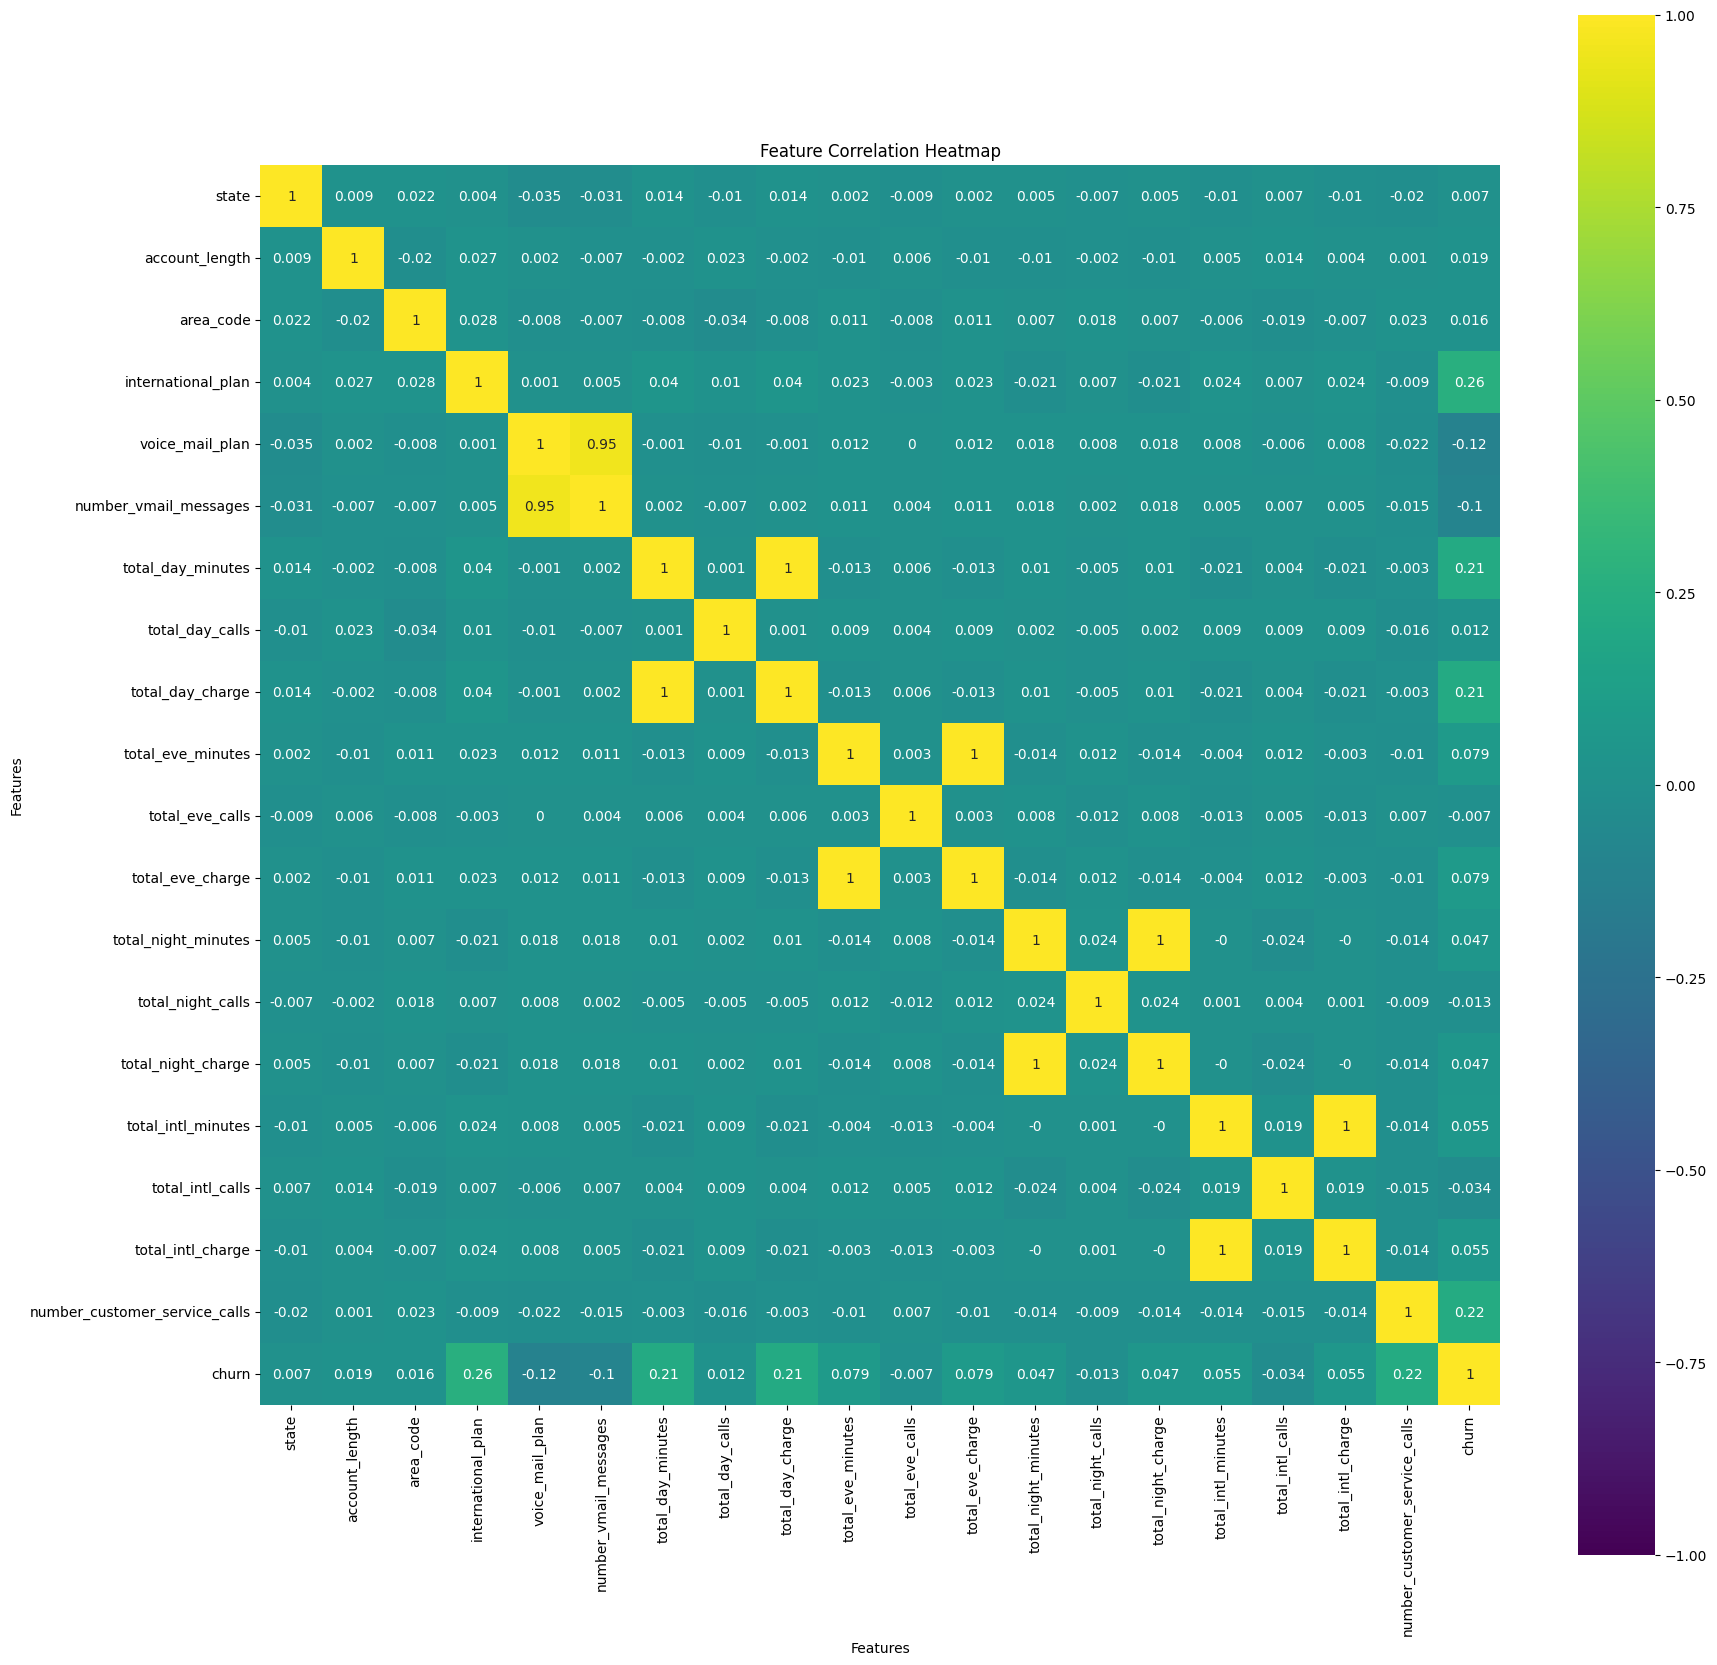

In [ ]:
# Calculate the correlation matrix
corr_matrix = round(df_train.corr(),3)

# Create a heatmap
plt.figure(figsize=(20, 20))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, square=True)

# Add labels and title
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

**Internpretation**

This displays the correlation between each of the features, with higher aboslute values indicating a strong connection between those features (which is why the relationship between the same features on the diagonal is 1). Lighter yellow values indicate a higher positive correlation (as the value of one feature increases so does the other) while darker purple values indicate a negative correlation.

For example, there is a strong relationship between total_eve_minutes_ and total_eve_charge, which makes sense because you pay for the amount of minutes that you use

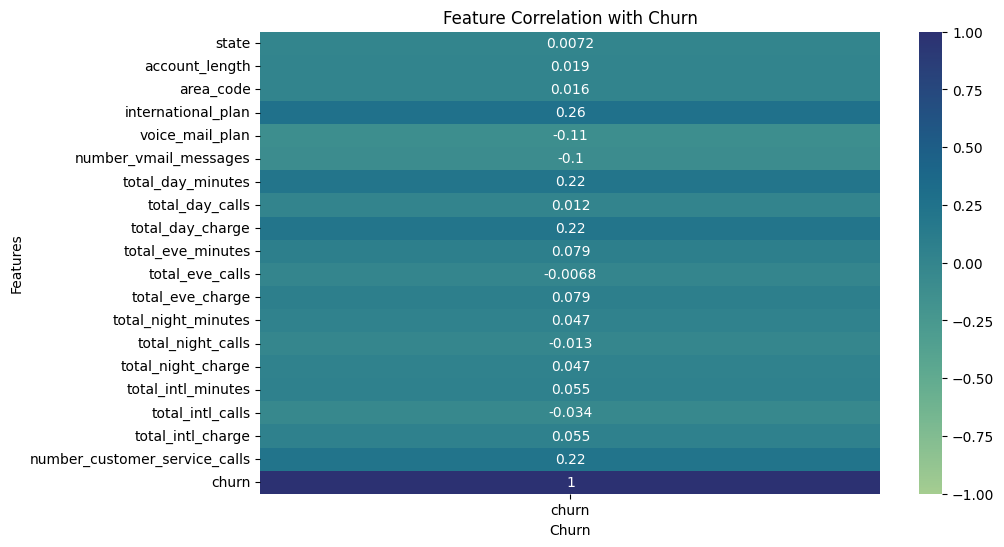

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_train.corr()

# Extract correlations related to the 'churn' column
churn_corr = corr_matrix[['churn']]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(churn_corr, annot=True, cmap='crest', vmin=-1, vmax=1)

# Add labels and title
plt.title('Feature Correlation with Churn')
plt.xlabel('Churn')
plt.ylabel('Features')

# Show the plot
plt.show()

Seaborn Bivariate Plotting of Top Features:

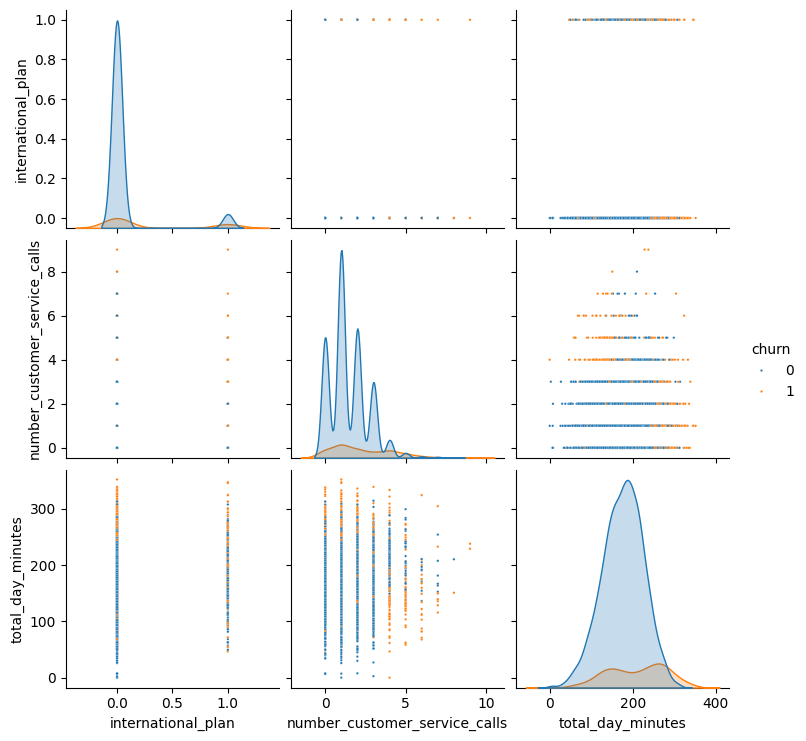

In [ ]:
# use seaborn pairplot to plot top correlated features (bivariate plotting)
top_features = ['international_plan', 'number_customer_service_calls', 'total_day_minutes', 'churn']
df_sub = df_train[top_features]

sns.pairplot(data=df_sub, hue = 'churn', plot_kws={'s':3})

## Splitting Training and Testing Data



In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns = 'churn', inplace = False)
y = df_train['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

## Test ML Algorithms with the Data

In [ ]:
from sklearn.metrics import accuracy_score

### Decision Trees

Test a decision tree model with the dataset using the default hyperparameters of the DecisionTreeClassifier model from Scikit-Learn:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9317647058823529


Find better hyperparameters for the decision tree using GridSearchCV:

In [ ]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.9564705882352941


Evaluate the Precision, Recall, F1 Score, and ROC AUC of the best model:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

if len(set(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
else:
    roc_auc = None

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
if roc_auc is not None:
    print(f'ROC AUC: {roc_auc}')

print(classification_report(y_test, y_pred))

Accuracy: 0.9564705882352941
Precision: 0.9550326256977418
Recall: 0.9564705882352941
F1 Score: 0.9546465901679273
ROC AUC: 0.8637690925426773
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       742
           1       0.90      0.74      0.81       108

    accuracy                           0.96       850
   macro avg       0.93      0.86      0.89       850
weighted avg       0.96      0.96      0.95       850



### Support Vector Machines (SVM)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm_model = SVC(kernel = 'rbf', C = 1.0, gamma = 'scale')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
display(accuracy)

0.8729411764705882

### Random Forest

In [ ]:

#packages to import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# create the model and fit it to the data
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_model.fit(X_train, y_train)

# generate predictions from the test data and analyze the model’s performance
rf_preds = rf_model.predict(X_test)

# raw accuracy score
raw_acc = accuracy_score(y_test, rf_preds)
print(raw_acc)

# area under roc curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
auc = auc(fpr, tpr)
print(auc)


0.9635294117647059
0.9272424378556454


In [ ]:
# get the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# recall score
recall = recall_score(y_test, y_pred, average='weighted')

# f1 score
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


print(classification_report(y_test, y_pred))

Precision: 0.7620262975778547
Recall: 0.8729411764705882
F1 Score: 0.813721548921076
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       742
           1       0.00      0.00      0.00       108

    accuracy                           0.87       850
   macro avg       0.44      0.50      0.47       850
weighted avg       0.76      0.87      0.81       850



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

###Logistic Regression

In [ ]:
# packages to import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# create the model and fit it to the data
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# generate predictions from the test data and analyze the model’s performance
lr_preds = lr_model.predict(X_test)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.8894117647058823
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       742
           1       0.73      0.20      0.32       108

    accuracy                           0.89       850
   macro avg       0.81      0.60      0.63       850
weighted avg       0.87      0.89      0.86       850

